### 출처:  도서 <생활 속 예제로 배우는 생생 데이터 분석>  조인석 저


# 코로나 바이러스 감염 현황 분석2


### 프로젝트 목표

이번에는 앞서 진행한 실습 초기에 제기했던 문제상황을 다시 한번 살펴보자. 대한민국과 하와이의 코로나 상황을 비교하는 것이 문제 상황이었다. 따라서 기존의 미국 전체 인구 기준으로 파악한 확진자 수로 산정한 데이터로는 풀고자 하는 문제의 답을 얻기에 무리가 있다. 따라서 이번에는 지난 실습에 사용한 데이터 셋에 존재하지 않는 새로운 데이터를 찾아 기존 데이터 셋에 합치는 작업을 수행해보자.

### 데이터 수집
이번 프로젝트에 필요한 데이터 셋은 하와이의 코로나 감염 현황 데이터이다. https://data.cdc.goc 에 들어가면 테이블 형태의 관련 데이터를 받을 수 있다. 해당 페이지에서 필터링과 정렬 기능을 통해 데이터를 정제한다음 csv파일로 다운로드 받으면 된다. 기존의 소스코드에 이어서 이전 실습 코드 끝부분에서부터 프로젝트 실습을 진행하겠다.

In [49]:
# csv 파일 읽어오기
import pandas as pd

raw_df = pd.read_csv('../sangsangdata/owid-covid-data.csv')

In [50]:
# 원천 데이터 데이터 프레임 정보 확인
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192301 entries, 0 to 192300
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    192301 non-null  object 
 1   continent                                   181123 non-null  object 
 2   location                                    192301 non-null  object 
 3   date                                        192301 non-null  object 
 4   total_cases                                 184750 non-null  float64
 5   new_cases                                   184508 non-null  float64
 6   new_cases_smoothed                          183334 non-null  float64
 7   total_deaths                                166260 non-null  float64
 8   new_deaths                                  166241 non-null  float64
 9   new_deaths_smoothed                         165078 non-null  float64
 

In [51]:
# 원천 데이터의 상위 5개 레코드 확인
raw_df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [52]:
# 원하는 열 리스트 만들기
selected_columns = ['iso_code', 'location', 'date', 'total_cases', 'population']

# 원하는 열로 개정된 데이터 프레임 생성
revised_df = raw_df[selected_columns]

# 개정된 데이터 프레임 데이터 일부 확인하기
revised_df.head()

,iso_code,location,date,total_cases,population
0,AFG,Afghanistan,2020-02-24,5.0,39835428.0
1,AFG,Afghanistan,2020-02-25,5.0,39835428.0
2,AFG,Afghanistan,2020-02-26,5.0,39835428.0
3,AFG,Afghanistan,2020-02-27,5.0,39835428.0
4,AFG,Afghanistan,2020-02-28,5.0,39835428.0


In [53]:
# 열 location 값 확인하기
location = revised_df['location']
location

0         Afghanistan
1         Afghanistan
2         Afghanistan
3         Afghanistan
4         Afghanistan
             ...     
192296       Zimbabwe
192297       Zimbabwe
192298       Zimbabwe
192299       Zimbabwe
192300       Zimbabwe
Name: location, Length: 192301, dtype: object

In [54]:
# location 열의 유일값 확인하기
location.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [55]:
# 대한민국 데이터 프레임 생성하기
kor_df = revised_df[revised_df.location == 'South Korea']

# 데이터 일부 확인하기
kor_df.head()

,iso_code,location,date,total_cases,population
160818,KOR,South Korea,2020-01-22,1.0,51305184.0
160819,KOR,South Korea,2020-01-23,1.0,51305184.0
160820,KOR,South Korea,2020-01-24,2.0,51305184.0
160821,KOR,South Korea,2020-01-25,2.0,51305184.0
160822,KOR,South Korea,2020-01-26,3.0,51305184.0


In [56]:
# 색인 변경하기
kor_date_index_df = kor_df.set_index('date')

# 데이터 일부 확인하기
kor_date_index_df.head()

,iso_code,location,total_cases,population
date,,,,
2020-01-22,KOR,South Korea,1.0,51305184.0
2020-01-23,KOR,South Korea,1.0,51305184.0
2020-01-24,KOR,South Korea,2.0,51305184.0
2020-01-25,KOR,South Korea,2.0,51305184.0
2020-01-26,KOR,South Korea,3.0,51305184.0


In [57]:
# 미국 데이터 프레임 생성하기
usa_df = revised_df[revised_df.location == 'United States']

# 색인 변경하기
usa_date_index_df = usa_df.set_index('date')

usa_date_index_df.head()

,iso_code,location,total_cases,population
date,,,,
2020-01-22,USA,United States,1.0,332915074.0
2020-01-23,USA,United States,1.0,332915074.0
2020-01-24,USA,United States,2.0,332915074.0
2020-01-25,USA,United States,2.0,332915074.0
2020-01-26,USA,United States,5.0,332915074.0


## 데이터 시각화

In [58]:
# 대한민국 확진자 수 구하기
kor_total_cases = kor_date_index_df['total_cases']
kor_total_cases

date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           3.0
                 ...    
2022-06-03    18153851.0
2022-06-04    18163686.0
2022-06-05    18168708.0
2022-06-06    18174880.0
2022-06-07    18188200.0
Name: total_cases, Length: 868, dtype: float64

In [59]:
# 미국 확진자 수 구하기
usa_total_cases = usa_date_index_df['total_cases']
usa_total_cases

date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           5.0
                 ...    
2022-06-03    84724329.0
2022-06-04    84748884.0
2022-06-05    84762022.0
2022-06-06    84882287.0
2022-06-07    85003945.0
Name: total_cases, Length: 868, dtype: float64

In [60]:
# 색인 확인하기
kor_date_index_df.index

Index(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26',
       '2020-01-27', '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
       ...
       '2022-05-29', '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02',
       '2022-06-03', '2022-06-04', '2022-06-05', '2022-06-06', '2022-06-07'],
      dtype='object', name='date', length=868)

In [61]:
# 시각화용 데이터프레임 생성
final_df = pd.DataFrame({
    'KOR':kor_total_cases,
    'USA':usa_total_cases
    }, index=kor_date_index_df.index

)

final_df.head()

,KOR,USA
date,,
2020-01-22,1.0,1.0
2020-01-23,1.0,1.0
2020-01-24,2.0,2.0
2020-01-25,2.0,2.0
2020-01-26,3.0,5.0


<AxesSubplot:xlabel='date'>

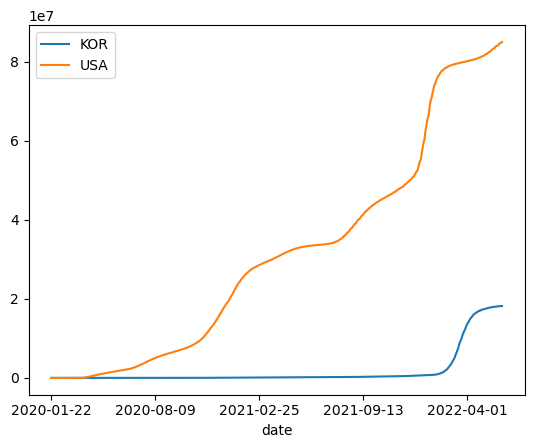

In [62]:
# 선 그래프 그리기
final_df.plot.line()

<AxesSubplot:xlabel='date'>

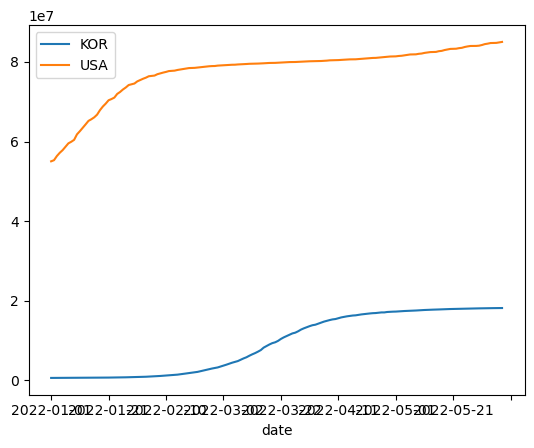

In [63]:
# 2022년 그래프 그리기 (6월까지)
final_df['2022-01-01':].plot.line()

<AxesSubplot:xlabel='date'>

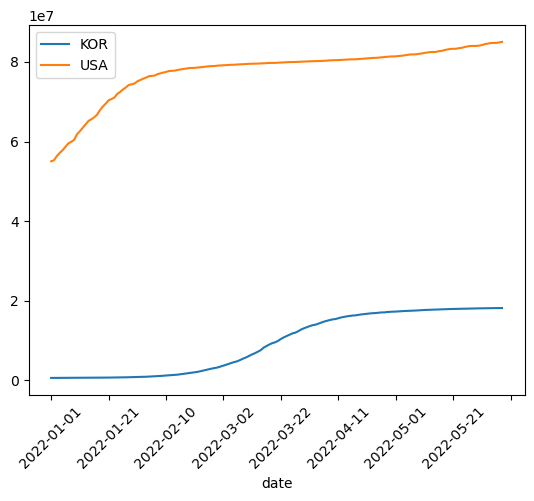

In [64]:
# x축 라벨 각도 변경하기
final_df['2022-01-01':].plot.line(rot=45)

In [65]:
# 대한민국 인구
kor_population = kor_date_index_df['population']['2020-01-22']

# 미국 인구
usa_population = usa_date_index_df['population']['2020-01-22']

print('미국인구(', usa_population, ') / 대한민국 인구(', kor_population, ')')

미국인구( 332915074.0 ) / 대한민국 인구( 51305184.0 )


In [66]:
# 인구 비율 구하기
rate = round((usa_population / kor_population), 2)
rate

6.49

In [67]:
# 확진자 비율을 적용한 최종 데이터프레임 생성하기
final_revised_df = pd.DataFrame({
    'KOR':kor_total_cases * rate,            # 비율 반영
    'USA':usa_total_cases
    }, index=kor_date_index_df.index
)

final_revised_df.head()

,KOR,USA
date,,
2020-01-22,6.49,1.0
2020-01-23,6.49,1.0
2020-01-24,12.98,2.0
2020-01-25,12.98,2.0
2020-01-26,19.47,5.0


<AxesSubplot:xlabel='date'>

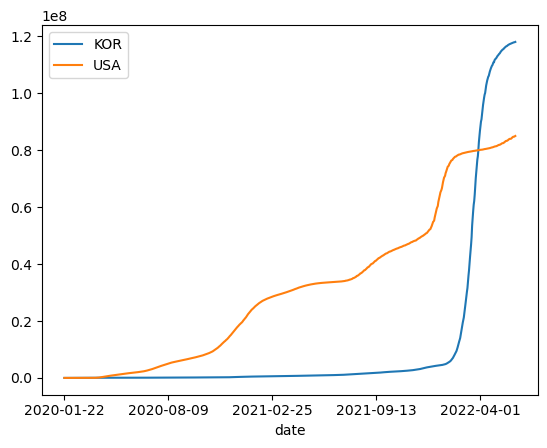

In [68]:
# 최종 전체 그래프 확인하기
final_revised_df[:].plot.line()

<AxesSubplot:xlabel='date'>

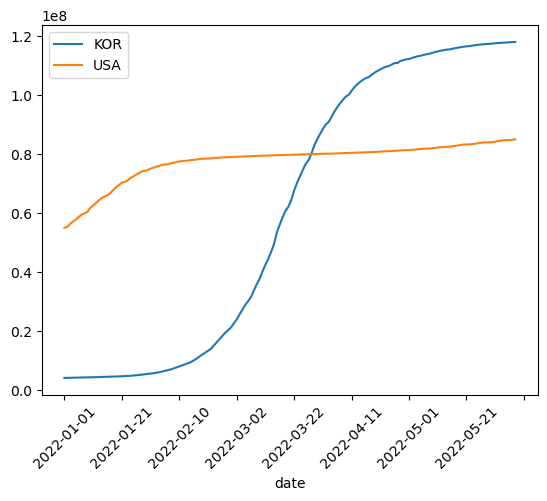

In [69]:
# 최종 2022년(6월까지) 그래프 확인하기
final_revised_df['2022-01-01':].plot.line(rot=45)

앞서 다운로드 해온 하와이 관련 csv 파일을 읽어오자.

In [70]:
# csv 파일 읽어오기
raw_hawaii_df = pd.read_csv('../sangsangdata/hawaii-covid-data.csv')

raw_hawaii_df.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,10/26/2021,HI,80876,NaN,NaN,69,10.0,883,NaN,NaN,0,0.0,10/27/2021 02:21:35 PM,Not agree,Not agree
1,06/17/2021,HI,35862,NaN,NaN,31,0.0,504,NaN,NaN,0,0.0,06/18/2021 01:48:26 PM,Not agree,Not agree
2,12/30/2021,HI,106350,NaN,NaN,3425,368.0,1074,NaN,NaN,0,0.0,12/31/2021 02:32:16 PM,Not agree,Not agree
3,11/12/2020,HI,16171,NaN,NaN,94,0.0,221,NaN,NaN,0,0.0,11/13/2020 02:54:34 PM,Not agree,Not agree
4,06/15/2021,HI,35802,NaN,NaN,33,5.0,503,NaN,NaN,0,0.0,06/16/2021 03:10:20 PM,Not agree,Not agree


위의 실행 결과를 확인해보면 중간중간에 NaN 데이터가 보인다. 이는 데이터가 존재하지 않을 때 판다스에서 사용하는 값이다. 즉 NaN이 표기된 곳에는 데이터가 존재하지 않는다. 전체 NaN 데이터의 분포를 info() 메서드로 확인해보자.

In [71]:
# 데이터 정보 확인하기
raw_hawaii_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   submission_date  912 non-null    object 
 1   state            912 non-null    object 
 2   tot_cases        912 non-null    int64  
 3   conf_cases       0 non-null      float64
 4   prob_cases       0 non-null      float64
 5   new_case         912 non-null    int64  
 6   pnew_case        869 non-null    float64
 7   tot_death        912 non-null    int64  
 8   conf_death       0 non-null      float64
 9   prob_death       0 non-null      float64
 10  new_death        912 non-null    int64  
 11  pnew_death       823 non-null    float64
 12  created_at       912 non-null    object 
 13  consent_cases    912 non-null    object 
 14  consent_deaths   912 non-null    object 
dtypes: float64(6), int64(4), object(5)
memory usage: 107.0+ KB


이제 탑재한 데이터 셋의 행 중 필요한 행만 추출해보자.

In [72]:
# 필요한 행 추출
filtered_hawaii_df = raw_hawaii_df[['submission_date', 'tot_cases']]

filtered_hawaii_df.head()

,submission_date,tot_cases
0,10/26/2021,80876
1,06/17/2021,35862
2,12/30/2021,106350
3,11/12/2020,16171
4,06/15/2021,35802


이번에는 날짜기준으로 다시 데이터를 정렬해보자(submission_date 기준). sort_values() 메서드를 활용하자.

In [73]:
# 데이터 정렬하기
sorted_hawaii_df = filtered_hawaii_df.sort_values(by="submission_date")

sorted_hawaii_df.head()

,submission_date,tot_cases
480,01/01/2021,21258
726,01/01/2022,112283
371,01/02/2021,21417
300,01/02/2022,115400
507,01/03/2021,21539


위 데이터를 확인해보면 submission_date의 데이터 타입이 문자열이어서 앞 글자 순으로 정렬이 되었다. 따라서 연도와 무관하게 정렬이 되었기 때문에 이를 다시 수정해보자. 이럴 때 사용할 수 있는것이 to_datetime() 메서드이다. 데이터 프레임에 날짜 데이터 타입의 값으로 이루어진 열을 추가해보자.

In [74]:
# submission_date를 date 타입으로 변환하여 열 추가하기.
sorted_hawaii_df['date'] = pd.to_datetime(filtered_hawaii_df['submission_date'])

sorted_hawaii_df.head()

,submission_date,tot_cases,date
480,01/01/2021,21258,2021-01-01
726,01/01/2022,112283,2022-01-01
371,01/02/2021,21417,2021-01-02
300,01/02/2022,115400,2022-01-02
507,01/03/2021,21539,2021-01-03


이제 다시 추가된 date 열을 기준으로 정렬해보자. 명명 인수 inplace를 True로 설정하면 해당 데이터 프레임 객체의 값이 변경된다.

In [75]:
# 데이터 정렬하기
sorted_hawaii_df.sort_values(by='date', inplace=True)

sorted_hawaii_df

,submission_date,tot_cases,date
617,01/22/2020,0,2020-01-22
91,01/23/2020,0,2020-01-23
797,01/24/2020,0,2020-01-24
466,01/25/2020,0,2020-01-25
396,01/26/2020,0,2020-01-26
...,...,...,...
29,07/17/2022,309561,2022-07-17
168,07/18/2022,309561,2022-07-18
669,07/19/2022,309561,2022-07-19
455,07/20/2022,313805,2022-07-20


set_index() 메서드를 사용해 색인을 date로 변경해보자. 이번에도 명명 인수 inplace=True를 활용해보자.

In [76]:
# 색인 변경하기
sorted_hawaii_df.set_index('date', inplace=True)

sorted_hawaii_df

,submission_date,tot_cases
date,,
2020-01-22,01/22/2020,0
2020-01-23,01/23/2020,0
2020-01-24,01/24/2020,0
2020-01-25,01/25/2020,0
2020-01-26,01/26/2020,0
...,...,...
2022-07-17,07/17/2022,309561
2022-07-18,07/18/2022,309561
2022-07-19,07/19/2022,309561


이제 데이터 시각화를 위한 데이터 프레임을 생성하기 위해 하와이 확진자 수로 이루어진 시리즈를 만들어보자. 날짜를 색인으로 하고, 전체 확진자 수를 값으로 하는 시리즈를 생성하는 코드를 짜보자.

In [77]:
# 하와이 확진자 수 시리즈 만들기
hawaii_total_cases = sorted_hawaii_df['tot_cases']

hawaii_total_cases

date
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2022-07-17    309561
2022-07-18    309561
2022-07-19    309561
2022-07-20    313805
2022-07-21    313805
Name: tot_cases, Length: 912, dtype: int64

이제 기존의 대한민국 데이터와 비교하기 위해 하와이 주의 인구를 알아야 한다. 이는 확보한 데이터셋에는 없는 데이터이므로 구글 검색 등을 통하여 2022년 하와이 주 전체 인구를 확인해보자. 확인결과 2022년 하와이 인구 수는 1,433,336명이다. 이제 대한민국과 하와이의 인구 비율을 구하자.

In [78]:
# 하와이 인구
hawaii_population = 1_433_336    #파이썬에서는 숫자 세자릿수를 구분하기 위해 (_) 언더바를 넣을 수 있다

# 하와이와 대한민국의 인구 비율
hawaii_rate = round((hawaii_population / kor_population), 2)
hawaii_rate

0.03

이제 시각화용 데이터 프레임을 만들어보자.

In [79]:
# 확진자 비율을 적용한 최종 데이터 프레임 생성하기
final_hawaii_revised_df = pd.DataFrame({
    'KOR' : kor_total_cases * hawaii_rate,
    'HAWAII' : hawaii_total_cases
    }, index=kor_date_index_df.index
)

final_hawaii_revised_df

,KOR,HAWAII
date,,
2020-01-22,0.03,0
2020-01-23,0.03,0
2020-01-24,0.06,0
2020-01-25,0.06,0
2020-01-26,0.09,0
...,...,...
2022-06-03,544615.53,275631
2022-06-04,544910.58,275631
2022-06-05,545061.24,275631


위 데이터 프레임을 확인해보면 하와이 열의 모든값이 NaN으로 설정되어 있다.(원래는 NaN으로 표기되어 나오나 여기에선 업데이트가 되면서 자동으로 수정되어 있다.) 값이 없다는 뜻이다. 무엇이 문제일까?

In [80]:
# 대한민국 확진자 수 시리즈 확인
kor_total_cases

date
2020-01-22           1.0
2020-01-23           1.0
2020-01-24           2.0
2020-01-25           2.0
2020-01-26           3.0
                 ...    
2022-06-03    18153851.0
2022-06-04    18163686.0
2022-06-05    18168708.0
2022-06-06    18174880.0
2022-06-07    18188200.0
Name: total_cases, Length: 868, dtype: float64

In [81]:
# 하와이 확진자 수 시리즈 확인
hawaii_total_cases

date
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         0
               ...  
2022-07-17    309561
2022-07-18    309561
2022-07-19    309561
2022-07-20    313805
2022-07-21    313805
Name: tot_cases, Length: 912, dtype: int64

하와이 확진자 수 엔트리가 더 많긴 하지만, 데이터프레임 생성시 대한민국 색인을 기준으로 했기 때문에 별 상관은 없다. 하와이 데이터 끝부분은 잘려나갈 것이기 때문이다. 그러면 어떤 것이 문제일까? 바로 색인의 데이터 타입이 다르기 때문이다. 데이터 타입을 확인해보자.

In [82]:
# 대한민국 시리즈 색인 데이터 타입 확인
print(kor_total_cases.index.dtype)

object


In [83]:
# 하와이 시리즈 색인 데이터 타입 확인
print(hawaii_total_cases.index.dtype)

datetime64[ns]


위에서 볼 수 있듯이 대한민국 시리즈의 색인 데이터 타입은 문자열이지만, 하와이 시리즈의 색인 데이터 타입은 날짜 타입이다. 그렇기 때문에 하와이 데이터의 값이 데이터프레임에 들어올 수 없었던 것이다.

이런 경우에 대비하여 판다스에서는 색인 데이터 타입을 변경할 수 있는 간편한 방법을 제공한다. astype() 메서드를 사용하면 된다.

In [84]:
# 하와이 시리즈 색인 데이터 타입 문자열로 변경하기
hawaii_total_cases.index = hawaii_total_cases.index.astype('string')

# 하와이 시리즈 색인 데이터 타입 재확인
print(hawaii_total_cases.index.dtype)

string


이제 시각화를 위한 최종 데이터프레임을 만들어보자. 데이터 타입을 바꿨으니 위에서 썼던 코드를 다시 쓰면 된다.

In [85]:
# 최종 데이터프레임 생성하기
final_hawaii_revised_df = pd.DataFrame({
    'KOR' : kor_total_cases * hawaii_rate,
    'HAWAII' : hawaii_total_cases
    }, index=kor_date_index_df.index
)

final_hawaii_revised_df

,KOR,HAWAII
date,,
2020-01-22,0.03,0
2020-01-23,0.03,0
2020-01-24,0.06,0
2020-01-25,0.06,0
2020-01-26,0.09,0
...,...,...
2022-06-03,544615.53,275631
2022-06-04,544910.58,275631
2022-06-05,545061.24,275631


이제 기존에 사용했던 소스코드를 다시 활용하여 그래프를 그려보자.

<AxesSubplot:xlabel='date'>

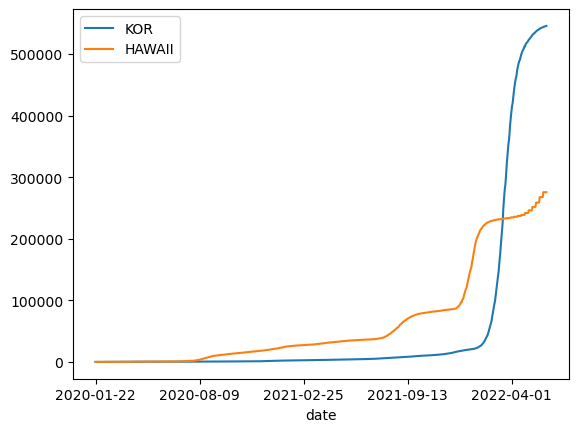

In [86]:
# 선 그래프 그리기
final_hawaii_revised_df.plot.line()

기존의 미국 확진자와 굉장히 비슷한 양상을 보이는 것을 확인할 수 있다. 이번엔 올해의 데이터로만 그래프를 표현해보자. x축 라벨의 표기는 45도 기울여서 출력한다.

<AxesSubplot:xlabel='date'>

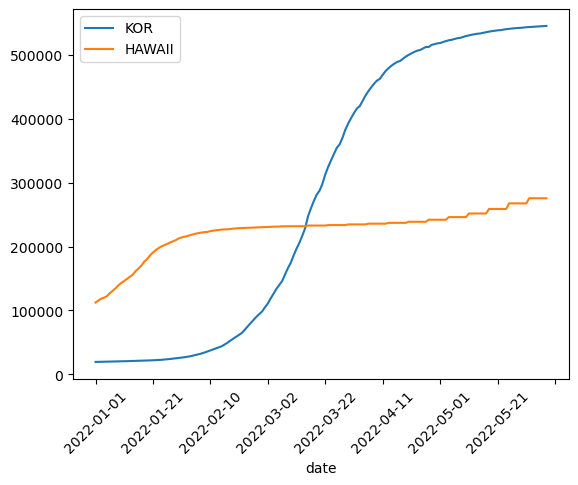

In [87]:
# 올해 그래프 확인하기
final_hawaii_revised_df['2022-01-01':].plot.line(rot=45)

이 역시 미국 전체의 양상과 크게 다르지 않아 보인다. 결과적으로 하와이 주의 코로나 확진자 수 비율은 서서히 증가하고 있으나, 대한민국에 비해 절반 수준 정도의 수치를 보인다는 것을 확인해 볼 수 있었다.